

# Assignment 7: **Convolutional Neural Networks**



## Notebook setup
In this notebook we are going to use Google Colab to allow GPU processing of your Convolutional Neural Networks (CNN's) and use TensorFlow to analyze them.



### Colab

#### GPU processing
By using Colab we can easily switch our code to GPU processing to use the parallel capacity of GPU processing speed up your training. To enable GPU processing you need to manually switch to a GPU device. You can do this by clicking Runtime -> Change runtime type and selecting GPU under Hardware Accelerator. Note that you have to rerun the cells from the top since the kernel gets restarted upon switching runtimes.

#### Mounting Google Drive
Additionally, we will mount your Google Drive to the Colab notebook to allow loading data from and saving to your Google Drive.


## Members of group 11
Frank Vollebregt 4574818</br>
Birgitte Hennink 4463064</br>
Srinath Jayaraman 5049903</br>
Caroline Cullinan 5135737

In [ ]:
# Add student name here
STUDENTNAME="Srinath"

In [ ]:
# enter the foldername in your Drive where you have saved the assignment example
# notebook and data, e.g. 'CS3542TU_CNN/'
if STUDENTNAME == 'Srinath':
  FOLDERNAME = 'CS3542TU_CNN'
elif STUDENTNAME == 'Caroline':
  FOLDERNAME = 'CS3542TU_CNN'
elif STUDENTNAME == 'Birgitte':
  FOLDERNAME = 'CS3542TU_CNN'
elif STUDENTNAME == 'Frank':
  FOLDERNAME = 'CS3542TU_CNN'
else:
  print('Please enter a valid student name!')

print('Hi {}'.format(STUDENTNAME))

Hi Srinath


In [ ]:
# this mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

assert FOLDERNAME is not None, "[!] Enter the foldername."

# now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

# this downloads the CIFAR-10 dataset to your Drive
# if it doesn't already exist.
%cd drive/My\ Drive/$FOLDERNAME/

Mounted at /content/drive
/content/drive/My Drive/CS3542TU_CNN



### Tensorflow

#### What is it?
TensorFlow is one of two popular deep learning frameworks. Tensorflow is a system for executing computational graphs over Tensor objects, with native support for performing backpropogation for its Variables. In it, we work with Tensors which are n-dimensional arrays analogous to the numpy ndarray. TensorFlow has many excellent tutorials available, including those from [Google themselves](https://www.tensorflow.org/get_started/get_started).

#### Why?
* We want you to be ready to use one of these frameworks so you can experiment more efficiently.
* We want you to stand on the shoulders of giants! TensorFlow is an excellent framework that will make your lives a lot easier.
* We want you to be exposed to the sort of deep learning code you might run into in academia or industry. 

### Install and load necessary packages

First, you need to install the necessary packages if they are not installed by default.

In [ ]:
 !pip install tensorflow

     |████████████████████████████████| 4.0 MB 13.1 MB/s 
     |████████████████████████████████| 463 kB 39.0 MB/s 
     |████████████████████████████████| 14.8 MB 184 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully uninstalled h5py-2.10.0
  Attempting uninstall: gast
    Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
t

Then load the necessary packages for this notebook:

In [ ]:
pip install tensorflow

     |████████████████████████████████| 458.3 MB 13 kB/s 
     |████████████████████████████████| 1.3 MB 40.9 MB/s 
     |████████████████████████████████| 462 kB 49.0 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-gpu 2.3.1 requires gast==0.3.3, but you have gast 0.4.0 which is incompatible.
tensorflow-gpu 2.3.1 requires h5py<2.11.0,>=2.10.0, but you have h5py 3.1.0 which is incompatible.
tensorflow-gpu 2.3.1 requires numpy<1.19.0,>=1.16.0, but you have numpy 1.19.5 which is incompatible.
tensorflow-gpu 2.3.1 requires tensorflow-estimator<2.4.0,>=2.3.0, but you have tensorflow-estimator 2.6.0 which is incompatible.


In [ ]:
from tensorflow.python.ops import control_flow_ops
import tensorflow as tf
#from tensorflow.python.ops import control_flow_ops
import numpy as np
import matplotlib.pyplot as plt
import sys
import h5py
from IPython import display
import random
%matplotlib inline

random.seed(42)

print("TensorFlow executing eagerly: {}".format(tf.executing_eagerly()))

ImportError: ignored

# Part 1: Understanding CNN's

When modelling an image using a regular feed-forward network, we find that the number of model parameters grows exponentially. 


---


**Self assessment**: How many parameters would there be in a feed-forward network with 2 hidden layers consisting of 512 and 256 neurons respectively, an output size of 10 and an input image of shape [32, 32, 3]? (Note that we represent each pixel in a colour image using three real-numbers for the Red, Green and Blue values -- called "channels" -- and hence the 32x32x3 shape.)


---


ConvNets address this model parameter issue by exploiting structure in the inputs to the network (in particular, by making the assumption that the input is a 3-D *volume*, which applies to images for example, where the 3 dimensions consist of the three RGB channels). The two key differences between a ConvNet and a Feed-forward network are:

* ConvNets have neurons that are arranged in 3 dimensions: width, height, depth. Note that *depth* here means channels, i.e. the depth of the input volume, not the depth of a deep neural network!
* The neurons in each layer are only connected to a small region of the layer before it.

Generally, a ConvNet architecture is made up of different types of layers, the most common being convolutional layers, pooling layers and fully-connected layers that we encountered in the last practical.

### Convolutional Layers
A 2-dimensional convolutional layer maps an input *volume* (meaning, a 3-D input tensor, e.g. [width, height, channels]) to an output *volume* through a set of learnable filters, which make up the parameters of the layer. Every filter is small spatially (along width and height), but extends through the full depth of the input volume. (Eg: A filter in the first layer of a ConvNet might have size [5, 5, 3]). During the forward pass, we convolve ("slide") each filter across the width and height of the input volume and compute element-wise dot products between the entries of the filter and the input at any position. As we slide the filter over the width and height of the input volume we will produce a 2-dimensional activation map that gives the responses of that filter at every spatial position. Each convolutional layer will have such a set of filters, and each of them will produce a separate 2-dimensional activation map. We then stack these activation maps along the depth-dimension to produce the output volume.

By using these filters which map to a small sub-volume of the input, we can to a large extent, control the parameter explosion that we would get with a (fully-connected) feed-forward network. This **parameter sharing** actually also tends to improve the performance of the model on inputs like natural images because it provides the model with some limited **translation invariance**. Translation invariance means that if the image (or a feature in the image) is translated (moved), the model will not be significantly affected. Think about why this is the case!

The following animation illustrates these ideas, make sure you understand them!

![Convolution Animation](https://i.stack.imgur.com/FjvuN.gif)

If the parameter sharing aspect of CNNs is still not clear, consider the following diagram which compares a simplified 1-D convolutional layer with a fully-connected layer. The diagram shows how a 1-dimensional input  $\mathbf{x}$ is mapped to a 1-dimensional output  $\mathbf{y}$ using both a fully-connected layer and a convolution layer, both without bias parameters. The colours of the edges represent the value of the weight parameters in the layers. For the fully-connected layer, the number of weights is the product of the input and output sizes, in this case, $6 \times 4 = 24$. On the other hand, the number of weights in the convolutional layer depends only on the filter size of the convolution, in this case, $3$, and is independent of the input and output sizes.

![Weight Sharing](https://i.imgur.com/gcmmZz4.png)

The hyper-parameters of a convolutional layer are as follows:
* **Filters** defines the number of filters in the layer
* **Kernel Size** defines the width and height of the filters (also called "kernels") in the layer. Note that kernels always have the same depth as the inputs to the layer.
* **Stride** defines the number of pixels by which we move the filter when "sliding" it along the input volume. Typically this value would be 1, but values of 2 and 3 are also sometimes used.
* **Padding** refers to the addition of 0-value pixels to the edges of the input volume along the width and height dimensions. In Tensorflow you can set this to "VALID", which essentially does no padding or "SAME" which pads the input such that the output width and height are the same as the input.

Let's look at a very simple, dummy example to see how the values of the hyper-parameters affect the output size of a convolutional layer.

Input shape: (10, 10, 3)


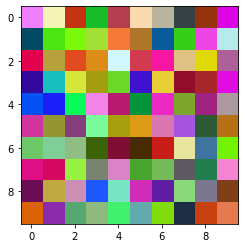

In [ ]:
# Create a random colour "image" of shape 10x10 with a depth of 3 (for red, green and blue)
dummy_input = np.random.uniform(size=[10, 10, 3])
fig, ax = plt.subplots(1, 1)
plt.imshow(dummy_input)
ax.grid(False)
print('Input shape: {}'.format(dummy_input.shape))

Now adjust the hyperparameters using the sliders on the right and see how the output shape changes for a [10, 10, 3] input.

In [ ]:
#@title Convolutional layer parameters {run: "auto"}
filters = 10  #@param { type: "slider", min:0, max: 10, step: 1 }
kernel_size = 3 #@param { type: "slider", min:1, max: 10, step: 1 }
stride = 3 #@param { type: "slider", min:1, max: 3, step: 1 }

conv_layer = tf.keras.layers.Conv2D(
    filters=filters,
    kernel_size=kernel_size,
    strides=stride,
    padding="valid",
    input_shape=[10, 10, 3])

# Convert the image to a tensor and add an extra batch dimension which
# the convolutional layer expects.
input_tensor = tf.convert_to_tensor(dummy_input[None, :, :, :])
convoluted = conv_layer(input_tensor)

print('The output dimension is: {}'.format(list(convoluted.shape)[1:]))
print('The number of parameters is: {}'.format(conv_layer.count_params()))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

The output dimension is: [3, 3, 10]
The number of parameters is: 280


Note especially how output width and height are related to ```kernel_size``` and ```stride```, and how the output depth is related to ```filters```.


#### Building up complex filters

One of the reasons that CNNs have been so successful is their ability to build up complex filters by composing more simple filters. For example, imagine a 5 layer CNN that has been trained to detect faces. The first 4 layers are convolutional and the last layer is fully-connected and outputs the final prediction (is there a face or not). We might find that the filters in each convolution layer pick out the following features:

1. lines (horizontal, vertical, diagonal), and colour gradients,
2. corners, circles and other simple shapes, and simple textures,
3. noses, mouths, and eyes,
4. whole faces.

The neural net has learned to pick out complex objects like facial features and even whole faces! The reason for this is that each successive layer can combine the filters from the previous layer to detect more and more sophisticated features. The following diagram (adapted from [this paper](http://web.eecs.umich.edu/~honglak/icml09-ConvolutionalDeepBeliefNetworks.pdf)) shows some really cool examples of this kind of behaviour. The lower level features (shown above) detect noses, eyes, and mouths, in the case of faces, and wheels, doors, and windows, for cars. The higher level features are then able to detect whole faces and cars.

![Imgur](https://i.imgur.com/653uIty.jpg)

The diagrams on page 7 of [this classic paper](https://cs.nyu.edu/~fergus/papers/zeilerECCV2014.pdf) show more examples of this phenomena and are definitely worth checking out!

### (Max) Pooling
A pooling layer reduces the spatial size of the representation. There are different reasons why we may want to do this. One is to reduce the number of parameters in the network. Imagine a convnet for a dataset with 10 classes. If the feature tensor produced by the final conv / pool / relu layer was say, of size 20x20 and had 100 feature channels, the final dense layer would have 20x20x100x10=400k parameters. However, if we down-sampled that layer to a 4x4 spatial size, we would have only 16k parameters. A big difference!

Another reason is that we want later features (deeper in the network) to have larger *receptive fields* (input regions that they look at), in order to represent bigger objects and object parts for instance. In particular, pooling stride gives later features much larger receptive fields so that they can effectively combine smaller features together.

A pooling layer has no trainable parameters. It applies some 2-D aggregation operation (usually a max(), but others like average() may also be used) to regions of the input volume. This is done independently for each depth dimension of the input. For example, a 2x2 max pooling operation with a stride of 2, downsamples every depth slice of the input by 2 along both the width and height.

The hyper-parameters of a pooling layer are as follows:
* **Pool Size** defines how many values are aggregated together.
* **Stride** defines the number of pixels by which we move the pooling filter when sliding it along the input. Typically this value would be equal to the pool size.
* **Padding** refers to the addition of 0-value pixels to the edges of the input volume along the width and height dimensions. In Tensorflow you can set this to "VALID", which essentially does no padding or "SAME" which pads the input such that the output width and height are the same as the input.



---


**Self Assessment**: *Do 2x2 max-pooling by hand, with a stride of 2, and "VALID" padding, on the following 2D input. What is the size of the output?*

\begin{bmatrix}
  9 & 5 & 4 & 5 & 6 & 4 \\
  6 & 6 & 3 & 5 & 8 & 2 \\
  4 & 6 & 9 & 1 & 3 & 6 \\
  9 & 7 & 1 & 5 & 8 & 1 \\
  4 & 9 & 9 & 5 & 7 & 3 \\
  7 & 3 & 6 & 4 & 9 & 1 
\end{bmatrix}
---



### Optional extra reading: Receptive fields

Earlier we mentioned that one reason to do pooling is to increase the sizes of the receptive fields of our features. Let's take a closer look at what we meant by this. 

The diagram below shows the effective receptive field of one output "neuron" in each layer of a few simple networks. What the diagram tells us is how many of the input values have an effect on each output value.

We can see that in the first two examples, with single convolutional layers, the receptive field is simply equal to the kernel size. 

However, the next two examples are a little more interesting. Here we have drastically increased the receptive field size, without a large increase in the number of parameters, by stacking convolution and pooling layers. The interesting thing here is that by using a pooling layer we increased our receptive field size by a much smaller cost (in the number of parameters) than if we'd simply increased the kernel sizes of our convolution layers.

You can read more about receptive fields [here](https://medium.com/mlreview/a-guide-to-receptive-field-arithmetic-for-convolutional-neural-networks-e0f514068807).


![Receptive Fields](https://i.imgur.com/TjxEsG4.png)


# Part 2: Building a CNN

## The CIFAR10 Dataset
Now that we understand convolutional, max-pooling and feed-forward layers, we can combine these as building blocks to build a ConvNet classifier for images. For this practical, we will use the colour image dataset CIFAR10 (pronounced "seefar ten") which consists of 50,000 training images and 10,000 test images. We will take 10,000 images from the training set to form a validation set and visualise some example images.

In [ ]:
cifar = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar.load_data()
cifar_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
# Take the last 10000 images from the training set to form a validation set
train_labels = train_labels.squeeze()
validation_images = train_images[-10000:, :, :]
validation_labels = train_labels[-10000:]
train_images = train_images[:-10000, :, :]
train_labels = train_labels[:-10000]

What are the shapes and data-types of train_images and train_labels?

In [ ]:
print('train_images.shape = {}, data-type = {}'.format(train_images.shape, train_images.dtype))
print('train_labels.shape = {}, data-type = {}'.format(train_labels.shape, train_labels.dtype))

print('validation_images.shape = {}, data-type = {}'.format(validation_images.shape, validation_images.dtype))
print('validation_labels.shape = {}, data-type = {}'.format(validation_labels.shape, validation_labels.dtype))

train_images.shape = (40000, 32, 32, 3), data-type = uint8
train_labels.shape = (40000,), data-type = uint8
validation_images.shape = (10000, 32, 32, 3), data-type = uint8
validation_labels.shape = (10000,), data-type = uint8


### Visualise examples from the dataset
Run the cell below multiple times to see various images. (They might look a bit blurry because we've blown up the small images.)

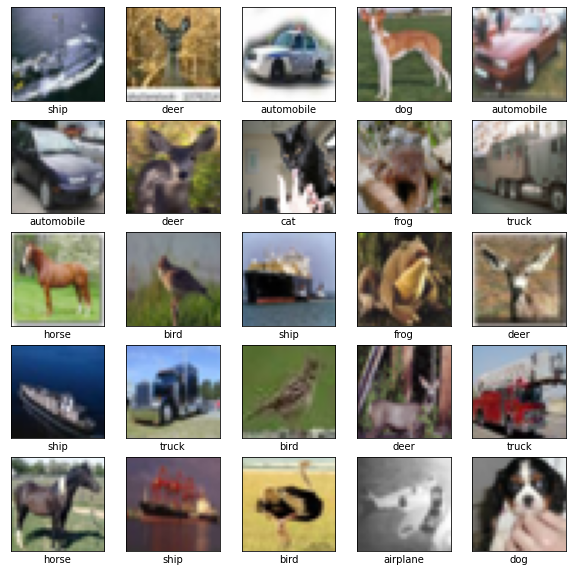

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')

  img_index = np.random.randint(0, 30000)
  plt.imshow(train_images[img_index])
  plt.xlabel(cifar_labels[train_labels[img_index]])

## A ConvNet Classifier
Finally, we build a simple convolutional architecture to classify the CIFAR images. We will build a mini version of the AlexNet architecture, which consists of 5 convolutional layers with max-pooling, followed by 3 fully-connected layers at the end. In order to investigate the effect each of these two layers has on the number of parameters, we'll build the model in two stages. 

First, the convolutional layers + max-pooling:

In [ ]:
# Define the convolutinal part of the model architecture using Keras Layers in a sequential model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=48, kernel_size=(3, 3), activation=tf.nn.relu, input_shape=(32, 32, 3), padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3)))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation=tf.nn.relu, padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3)))
model.add(tf.keras.layers.Conv2D(filters=192, kernel_size=(3, 3), activation=tf.nn.relu, padding='same'))
model.add(tf.keras.layers.Conv2D(filters=192, kernel_size=(3, 3), activation=tf.nn.relu, padding='same'))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation=tf.nn.relu, padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3)))

As you can see in the previous block it is rather straightforward to build Tensorflow Keras Sequential model, where we first initialize the model and subsequently add layers that interact which each other sequentially. If we want to better understand the architecture, we can easily inspect this using the model summary function in Keras:


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 128)       55424     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 192)         221376    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 192)         331968    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)         2

Now we add a fully-connected part. Note that we also add "Dropout" after the first fully-connected layer. Dropout is a regularization technique which randomly zeros out ("drops") connections between neurons, and it was one of the key innovations of the AlexNet paper in 2012.

In [ ]:
model.add(tf.keras.layers.Flatten())  # Flatten "squeezes" a 3-D volume down into a single vector.
model.add(tf.keras.layers.Dense(1024, activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(1024, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 128)       55424     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 192)         221376    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 192)         331968    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)         2

Once we have defined the CNN model layers, we can initialize it with defining:



*   the **batch size**: number of samples processed before the model is updated
*   the **number of epochs**: number of complete passes through the training dataset before the training stops
*   the **optimizer** 
*   the **loss function**: the quantity that a model should seek to minimize during training.
*   the **metric**: function that is used to judge the performance of your model. Metric functions are similar to loss functions, except that the results from evaluating a metric are not used when training the model. 

In [ ]:
batch_size = 128 # number of samples processed before the model is updated
num_epochs = 10  # number of complete passes through the training dataset before the training stops

# Compiling the model adds a loss function, optimiser and metrics to track during training
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

### Fit the model to the training data

Now that the CNN is completely initialised, we can start training it with the fit function:

In [ ]:
# The fit function allows you to fit the compiled model to some training data
history = model.fit(x=train_images,
          y=train_labels,
          batch_size=batch_size,
          epochs=num_epochs,
          validation_data=(validation_images, validation_labels.astype(np.float32)))
print('Training complete')

### Assess and visualize performance

The fit function already print some of it's output to the screen, but we can also access this information if we write it to a variable (e.g., `history `in previous block). In the following block we can for example plot the loss and accuracy of the model fit for each epoch.

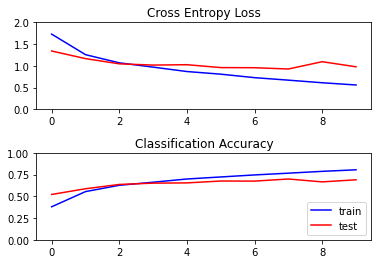

In [ ]:
# plot loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='red', label='test')
plt.ylim(0,2)
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='red', label='test')
plt.ylim(0,1)
# add legend
plt.legend()
# Tweak spacing between subplots to prevent labels from overlapping
plt.subplots_adjust(hspace=0.5)

### Test performance
Finally, we evaluate how well the model does on the held-out test-set

In [ ]:
metric_values = model.evaluate(x=test_images, y=test_labels)

print('Final TEST performance')
for metric_value, metric_name in zip(metric_values, model.metrics_names):
  print('{}: {}'.format(metric_name, metric_value))

313/313 [==============================] - 9s 30ms/step - loss: 1.8827 - accuracy: 0.3034
Final TEST performance
loss: 1.8827009201049805
accuracy: 0.3034000098705292


Note that we achieved roughly 80% training set accuracy, but our test accuracy is only around 67%. What do you think may be the reason for this?

### Classifying examples
We now use our trained model to classify a sample of 25 images from the test set. We pass these 25 images to the  ```model.predict``` function, which returns a [25, 10] dimensional matrix. The entry at position $(i, j)$ of this matrix contains the probability that image $i$ belongs to class $j$. We obtain the most-likely prediction using the ```np.argmax``` function which returns the index of the maximum entry along the columns. Finally, we plot the result with the prediction and prediction probability labelled underneath the image and true label on the side. 

In [ ]:
img_indices = np.random.randint(0, len(test_images), size=[25])
sample_test_images = test_images[img_indices]
sample_test_labels = [cifar_labels[i] for i in test_labels[img_indices].squeeze()]

predictions = model.predict(sample_test_images)
max_prediction = np.argmax(predictions, axis=1)
prediction_probs = np.max(predictions, axis=1)

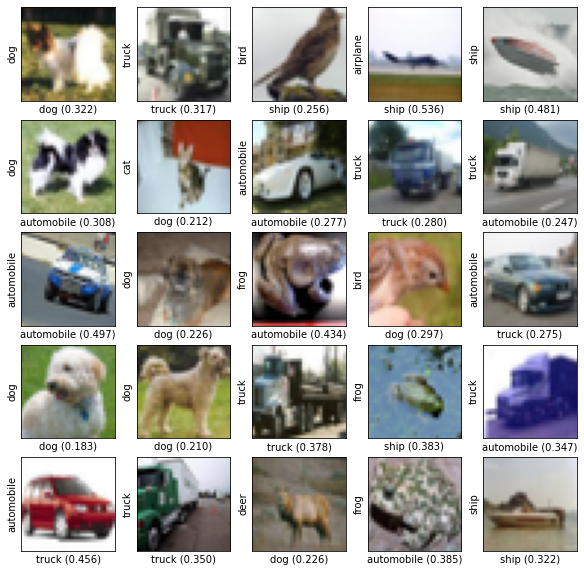

In [ ]:
plt.figure(figsize=(10,10))
for i, (img, prediction, prob, true_label) in enumerate(
    zip(sample_test_images, max_prediction, prediction_probs, sample_test_labels)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')

  plt.imshow(img)
  plt.xlabel('{} ({:0.3f})'.format(cifar_labels[prediction], prob))
  plt.ylabel('{}'.format(true_label))




---

**Self assessment**:  What do you think of the model's predictions? Looking at the model's confidence (the probability assigned to the predicted class), look for examples of the following cases:
1. The model was correct with high confidence
2. The model was correct with low confidence
3. The model was incorrect with high confidence
4. The model was incorrect with low confidence

What do you think the (relative) loss values would be in those cases? *


---



### Optional extra reading: CNN architectures

Deciding on the architecture for a CNN, i.e. the combination of convolution, pooling, dense, and other layers, can be tricky and often can seem arbitrary. On top of that, one also has to make decisions such as what kind of pooling, which activation functions, and what size of convolution to use, among other things. For new and old practitioners of deep learning, these choices can be overwhelming. 

However, by examining existing successful CNN architectures we can learn a lot about what works and what doesn't. (We can even apply these existing architectures to our problems since many deep learning libraries, such as TensorFlow and Keras, have them [built in](https://keras.io/applications/#available-models) and it is even possible to fine-tune pre-trained models to our specific problem using [transfer learning](https://cs231n.github.io/transfer-learning/).)

[This article](https://medium.com/@sidereal/cnns-architectures-lenet-alexnet-vgg-googlenet-resnet-and-more-666091488df5) describes many of the most successful CNN architectures in recent years, including [ResNet](https://arxiv.org/abs/1512.03385), [Inception](https://arxiv.org/pdf/1512.00567v3.pdf) and [VGG](https://arxiv.org/pdf/1409.1556.pdf). For a more detailed and technical description of these models and more see [these slides](http://cs231n.stanford.edu/slides/2017/cs231n_2017_lecture9.pdf). Reading through these resources should give you insights into why these architectures are successful as well as best practices and current trends for CNNs that will help you design your own architectures.

For example, one of the practices you might pick up on is the use of 3x3 convolutions. You'll notices that older architectures such as [AlexNet](https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf) used a range of convolutions from 7x7 down to 3x3. However, newer architectures such as VGG and ResNet use 3x3 convolutions almost exclusively. In short, the reason is that stacking 3x3 convolutions gives you the same receptive field as a larger convolution but with more non-linearity. 

---
**Self assessment**: Here are some other questions you may want to think about while investigating these architectures:


* Why do modern architectures use less max-pooling?
* What does a 1x1 convolution do?

In [ ]:
## Model with pooling layers less filters
model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.Conv2D(filters=48, kernel_size=(3, 3), activation=tf.nn.relu, input_shape=(32, 32, 3), padding='same'))
model1.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3)))
model1.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3),activation=tf.nn.relu, padding='same'))
model1.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3)))
model1.add(tf.keras.layers.Conv2D(filters=192, kernel_size=(3, 3), activation=tf.nn.relu, padding='same'))
model1.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3)))
model1.add(tf.keras.layers.Flatten())  # Flatten "squeezes" a 3-D volume down into a single vector.
model1.add(tf.keras.layers.Dense(1024, activation=tf.nn.relu))
model1.add(tf.keras.layers.Dropout(rate=0.5))
model1.add(tf.keras.layers.Dense(1024, activation=tf.nn.relu))
model1.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
model1.summary()

model1.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

history1 = model1.fit(x=train_images,
          y=train_labels,
          batch_size=128,
          epochs=10,
          validation_data=(validation_images, validation_labels.astype(np.float32)))
print('Training complete')

# plot loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history1.history['loss'], color='blue', label='train')
plt.plot(history1.history['val_loss'], color='red', label='test')
plt.ylim(0,2)
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history1.history['accuracy'], color='blue', label='train')
plt.plot(history1.history['val_accuracy'], color='red', label='test')
plt.ylim(0,1)
# add legend
plt.legend()
# Tweak spacing between subplots to prevent labels from overlapping
plt.subplots_adjust(hspace=0.5)


In [ ]:
## Model with no pooling layers
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from keras.layers import Dense, Activation, Flatten
input_shape = (32,32,3)

cnn1 = Sequential([
    Conv2D(8, kernel_size=(3, 3), activation='relu',padding='same',input_shape=input_shape),
    Conv2D(16, kernel_size=(5, 5), activation='relu'),
    Conv2D(32, kernel_size=(7, 7), activation='relu'),
    Flatten(),
    Dense(84, activation='relu'),
    Dense(10, activation='softmax')
])

# caroline's cnn1 - could not obtain more than .09 accuracy with the #-out code above.
# Srinath, trying running and visualising (Q3) both?
# cnn1 = tf.keras.models.Sequential()
# cnn1.add(tf.keras.layers.Conv2D(filters=48, kernel_size=(3, 3), activation=tf.nn.relu, input_shape=(32, 32, 3), padding='same'))
# cnn1.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3),activation=tf.nn.relu, padding='same'))
# cnn1.add(tf.keras.layers.Conv2D(filters=192, kernel_size=(3, 3), activation=tf.nn.relu, padding='same'))
# cnn1.add(tf.keras.layers.Flatten())  # Flatten "squeezes" a 3-D volume down into a single vector.
# cnn1.add(tf.keras.layers.Dense(1024, activation=tf.nn.relu))
# cnn1.add(tf.keras.layers.Dropout(rate=0.5))
# cnn1.add(tf.keras.layers.Dense(1024, activation=tf.nn.relu))
# cnn1.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

# cnn1.summary()

# cnn1.compile(optimizer=tf.keras.optimizers.Adam(),
#               loss=tf.keras.losses.sparse_categorical_crossentropy,
#               metrics=['accuracy'])

# history1 = cnn1.fit(x=train_images,
#           y=train_labels,
#           batch_size=10,
#           epochs=10,
#           validation_data=(validation_images, validation_labels.astype(np.float32)))
# print('Training complete')

# # plot loss
# plt.subplot(211)
# plt.title('Cross Entropy Loss')
# plt.plot(history1.history['loss'], color='blue', label='train')
# plt.plot(history1.history['val_loss'], color='red', label='test')
# plt.ylim(0,2)
# # plot accuracy
# plt.subplot(212)
# plt.title('Classification Accuracy')
# plt.plot(history1.history['accuracy'], color='blue', label='train')
# plt.plot(history1.history['val_accuracy'], color='red', label='test')
# plt.ylim(0,1)
# # add legend
# plt.legend()
# # Tweak spacing between subplots to prevent labels from overlapping
# plt.subplots_adjust(hspace=0.5)


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 32, 32, 8)         224       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 28, 28, 16)        3216      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 22, 22, 32)        25120     
_________________________________________________________________
flatten_4 (Flatten)          (None, 15488)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 84)                1301076   
_________________________________________________________________
dense_12 (Dense)             (None, 10)                850       
Total params: 1,330,486
Trainable params: 1,330,486
Non-trainable params: 0
____________________________________________

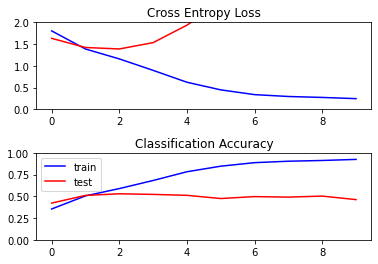

In [ ]:
## Model with no pooling layers
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from keras.layers import Dense, Activation, Flatten
input_shape = (32,32,3)
cnn1 = Sequential([
    Conv2D(8, kernel_size=(3, 3), activation='relu',padding='same',input_shape=input_shape),
    Conv2D(16, kernel_size=(5, 5), activation='relu'),
    Conv2D(32, kernel_size=(7, 7), activation='relu'),
    Flatten(),
    Dense(84, activation='relu'),
    Dense(10, activation='softmax')
])
cnn1.summary()

cnn1.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

history1 = cnn1.fit(x=train_images,
          y=train_labels,
          batch_size=16,
          epochs=10,
          validation_data=(validation_images, validation_labels.astype(np.float32)))
print('Training complete')

# plot loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history1.history['loss'], color='blue', label='train')
plt.plot(history1.history['val_loss'], color='red', label='test')
plt.ylim(0,2)
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history1.history['accuracy'], color='blue', label='train')
plt.plot(history1.history['val_accuracy'], color='red', label='test')
plt.ylim(0,1)
# add legend
plt.legend()
# Tweak spacing between subplots to prevent labels from overlapping
plt.subplots_adjust(hspace=0.5)


In [ ]:
# save cnn1
cnn1.save('q1_cnn1')

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 8)         224       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 16)        3216      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 22, 22, 32)        25120     
_________________________________________________________________
flatten_3 (Flatten)          (None, 15488)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 84)                1301076   
_________________________________________________________________
dense_9 (Dense)              (None, 10)                850       
Total params: 1,330,486
Trainable params: 1,330,486
Non-trainable params: 0
____________________________________________

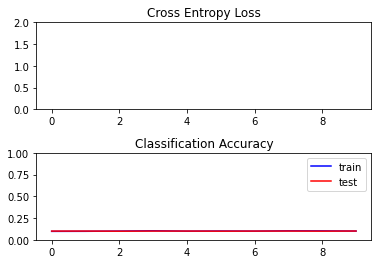

In [ ]:
#Model with 2000 training values and 2000 validation values
train_labels_half = train_labels.squeeze()
validation_images_half = train_images[-20000:, :, :]
validation_labels_half = train_labels[-20000:]
train_images_half = train_images[:-20000, :, :]
train_labels_half = train_labels[:-20000]

input_shape = (32,32,3)
cnn_half = Sequential([
    Conv2D(8, kernel_size=(3, 3), activation='relu',padding='same',input_shape=input_shape),
    Conv2D(16, kernel_size=(5, 5), activation='relu'),
    Conv2D(32, kernel_size=(7, 7), activation='relu'),
    Flatten(),
    Dense(84, activation='relu'),
    Dense(10, activation='softmax')
])
cnn_half.summary()

cnn_half.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

history_half = cnn_half.fit(x=train_images_half,
          y=train_labels_half,
          batch_size=16,
          epochs=10,
          validation_data=(validation_images_half, validation_labels_half.astype(np.float32)))
print('Training complete')

# plot loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history_half.history['loss'], color='blue', label='train')
plt.plot(history_half.history['val_loss'], color='red', label='test')
plt.ylim(0,2)
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history_half.history['accuracy'], color='blue', label='train')
plt.plot(history_half.history['val_accuracy'], color='red', label='test')
plt.ylim(0,1)
# add legend
plt.legend()
# Tweak spacing between subplots to prevent labels from overlapping
plt.subplots_adjust(hspace=0.5)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 32, 32, 8)         224       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 28, 28, 16)        3216      
_________________________________________________________________
flatten_4 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 84)                1053780   
_________________________________________________________________
dense_11 (Dense)             (None, 10)                850       
Total params: 1,058,070
Trainable params: 1,058,070
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
2500/2500 [==============================] - 7s 3ms/step - loss: 2.4787 - accuracy: 0.1176 - val_lo

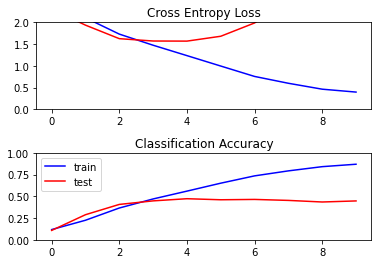

In [ ]:
## Model with no pooling layers with fewer filters
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from keras.layers import Dense, Activation, Flatten
input_shape = (32,32,3)
cnn_less = Sequential([
    Conv2D(8, kernel_size=(3, 3), activation='relu',padding='same',input_shape=input_shape),
    Conv2D(16, kernel_size=(5, 5), activation='relu'),
    Flatten(),
    Dense(84, activation='relu'),
    Dense(10, activation='softmax')
])
cnn_less.summary()

cnn_less.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

history_less = cnn_less.fit(x=train_images,
          y=train_labels,
          batch_size=16,
          epochs=10,
          validation_data=(validation_images, validation_labels.astype(np.float32)))
print('Training complete')

# plot loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history_less.history['loss'], color='blue', label='train')
plt.plot(history_less.history['val_loss'], color='red', label='test')
plt.ylim(0,2)
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history_less.history['accuracy'], color='blue', label='train')
plt.plot(history_less.history['val_accuracy'], color='red', label='test')
plt.ylim(0,1)
# add legend
plt.legend()
# Tweak spacing between subplots to prevent labels from overlapping
plt.subplots_adjust(hspace=0.5)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 32, 32, 8)         224       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 32, 32, 16)        3216      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 26, 26, 32)        25120     
_________________________________________________________________
flatten_5 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 84)                1817172   
_________________________________________________________________
dense_13 (Dense)             (None, 10)                850       
Total params: 1,846,582
Trainable params: 1,846,582
Non-trainable params: 0
____________________________________________

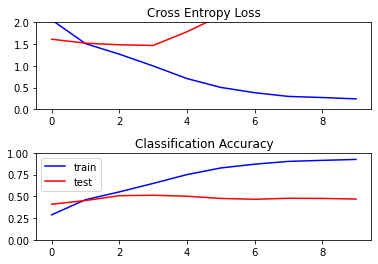

In [ ]:
## Model with no pooling layers with more more padding
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from keras.layers import Dense, Activation, Flatten
input_shape = (32,32,3)
cnn_more = Sequential([
    Conv2D(8, kernel_size=(3, 3), activation='relu',padding='same',input_shape=input_shape),
    Conv2D(16, kernel_size=(5, 5), activation='relu',padding='same'),
    Conv2D(32, kernel_size=(7, 7), activation='relu'),
    Flatten(),
    Dense(84, activation='relu'),
    Dense(10, activation='softmax')
])
cnn_more.summary()

cnn_more.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

history_more = cnn_more.fit(x=train_images,
          y=train_labels,
          batch_size=16,
          epochs=10,
          validation_data=(validation_images, validation_labels.astype(np.float32)))
print('Training complete')

# plot loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history_more.history['loss'], color='blue', label='train')
plt.plot(history_more.history['val_loss'], color='red', label='test')
plt.ylim(0,2)
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history_more.history['accuracy'], color='blue', label='train')
plt.plot(history_more.history['val_accuracy'], color='red', label='test')
plt.ylim(0,1)
# add legend
plt.legend()
# Tweak spacing between subplots to prevent labels from overlapping
plt.subplots_adjust(hspace=0.5)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 16, 16, 8)         224       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 6, 6, 16)          3216      
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 2, 2, 32)          4640      
_________________________________________________________________
flatten_6 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 84)                10836     
_________________________________________________________________
dense_15 (Dense)             (None, 10)                850       
Total params: 19,766
Trainable params: 19,766
Non-trainable params: 0
__________________________________________________

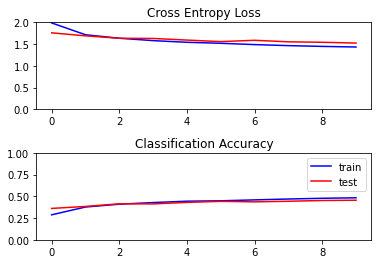

In [ ]:
## Model with adjusting stride
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from keras.layers import Dense, Activation, Flatten
input_shape = (32,32,3)
cnn_stride = Sequential([
    Conv2D(8, strides = (2,2), kernel_size=(3, 3), activation='relu',padding='same',input_shape=input_shape),
    Conv2D(16, strides = (2,2), kernel_size=(5, 5), activation='relu'),
    Conv2D(32, strides = (2,2), kernel_size=(3, 3), activation='relu'),
    Flatten(),
    Dense(84, activation='relu'),
    Dense(10, activation='softmax')
])
cnn_stride.summary()

cnn_stride.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

history_stride = cnn_stride.fit(x=train_images,
          y=train_labels,
          batch_size=16,
          epochs=10,
          validation_data=(validation_images, validation_labels.astype(np.float32)))
print('Training complete')

# plot loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history_stride.history['loss'], color='blue', label='train')
plt.plot(history_stride.history['val_loss'], color='red', label='test')
plt.ylim(0,2)
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history_stride.history['accuracy'], color='blue', label='train')
plt.plot(history_stride.history['val_accuracy'], color='red', label='test')
plt.ylim(0,1)
# add legend
plt.legend()
# Tweak spacing between subplots to prevent labels from overlapping
plt.subplots_adjust(hspace=0.5)

## Question 1: model architecture
Experiment with the network architecture, try changing the numbers, types and sizes of layers, the sizes of filters, using different padding etc. 

Explain and show how these decisions affect architecture and the performance of the model? Illustrate this by plotting loss and accuracy for training and testing for your different models. 

In particular, try building a *fully convolutinal* network, with no (max-)pooling layers. 

**Analysis**
If we apply less layers to the model with pooling the accuracy of the test set decreases and the accuracy of the training set decreases slightly. 
Firstly, a model had been created which has no maximum pooling layers based on the existing model. If the pooling layers were removed from the model, it became clear that the model had a longer runtime. As there were the same amount of connected layers and convolutional layers. Besides, it became clear that the output shapes didn't reduced when the pooling layers were removed. Therefore, we have adjusted the model with no pooling layers to make sure the runtime decreased. This was done with 3 convolutional layers with 3 different sizes of 3x3, 5x5,7x7. This is followed up by 2 fully connected layers. The accuracy of the training set was 91!, however the accuracy of the testing set was 48%. If the number of test and training set was halved, the accuracy was very lowe. Hence, we will continue with a data set of 3000 training set values and 1000 testing set values. If the number of filters was reduced, the accuracy of the training set was 92%, however the accuracy of the testing set was reduced to 44%. If the padding is applied to one extra convolutional layer, it became clear that the accuracy of the test set reduced and the loss increased a lot for the test set. If the stride is adjusted, the accuracy of the training and test set do match more, however this is still quite low as they are both close to 50%. 

## Question 2: model generalisation
Add DROPOUT ([Tensorflow documentation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout)) and BATCH NORMALISATION ([Tensorflow documentation](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/layers/BatchNormalization) to improve the model's generalisation. You can do this by adding `model.add(tf.keras.layers.Dropout())` and `tf.keras.layers.BatchNormalization()` layers to your sequential model.

What is the effect of the generalization efforts on the performance of the model? Illustrate this by plotting loss and accuracy for training and testing for your different models.

Based on your experiments so far, build a model that has >80% accuracy on the test set and illustrate its performance.

In [ ]:
# This helper function saves us some code copy-pasting, by training a network and outputting its results when given a list of layers.
def train_model_with_params(layers, batch_size=128, num_epochs=10):
    # Define the convolutinal part of the model architecture using Keras Layers in a sequential model
    model = tf.keras.models.Sequential(layers)
    print(model.summary())

    # Compiling the model adds a loss function, optimiser and metrics to track during training
    model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss=tf.keras.losses.sparse_categorical_crossentropy,
                  metrics=['accuracy'])

    # The fit function allows you to fit the compiled model to some training data
    history = model.fit(x=train_images,
                        y=train_labels,
                        batch_size=batch_size,
                        epochs=num_epochs,
                        validation_data=(validation_images, validation_labels.astype(np.float32)))
    print('Training complete')

    # plot loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='red', label='test')
    plt.ylim(0, 2)
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='red', label='test')
    plt.ylim(0, 1)
    # add legend
    plt.legend()
    # Tweak spacing between subplots to prevent labels from overlapping
    plt.subplots_adjust(hspace=0.5)

    plt.show()

    metric_values = model.evaluate(x=test_images, y=test_labels)

    print('Final TEST performance')
    for metric_value, metric_name in zip(metric_values, model.metrics_names):
        print('{}: {}'.format(metric_name, metric_value))
    
    # Finally, return the model. If desired, we can use it for classification
    return model

# This helper function should be able to, given a model, predict some outcomes and show them in a grid
def show_random_predictions(model_in):
    img_indices = np.random.randint(0, len(test_images), size=[25])
    sample_test_images = test_images[img_indices]
    sample_test_labels = [cifar_labels[i] for i in test_labels[img_indices].squeeze()]

    predictions = model_in.predict(sample_test_images)
    max_prediction = np.argmax(predictions, axis=1)
    prediction_probs = np.max(predictions, axis=1)
    
    plt.figure(figsize=(10,10))
    for i, (img, prediction, prob, true_label) in enumerate(
        zip(sample_test_images, max_prediction, prediction_probs, sample_test_labels)):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid('off')
        plt.imshow(img)
        plt.xlabel('{} ({:0.3f})'.format(cifar_labels[prediction], prob))
        plt.ylabel('{}'.format(true_label))
    plt.show()
    


In [ ]:
# For reference, this is the orginal set of layers from the first part of the assignment
original_layers = [
    tf.keras.layers.Conv2D(filters=48, kernel_size=(3, 3), activation=tf.nn.relu, input_shape=(32, 32, 3), padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(3, 3)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation=tf.nn.relu, padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(3, 3)),
    tf.keras.layers.Conv2D(filters=192, kernel_size=(3, 3), activation=tf.nn.relu, padding='same'),
    tf.keras.layers.Conv2D(filters=192, kernel_size=(3, 3), activation=tf.nn.relu, padding='same'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation=tf.nn.relu, padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(3, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
]

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 32, 32, 192)       83136     
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 32, 32, 192)       331968    
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 32, 32, 128)       221312    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 10, 10, 192)      

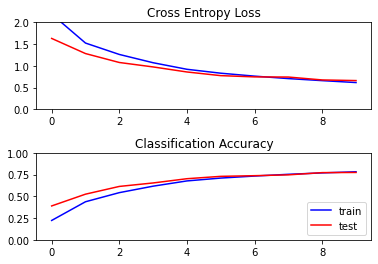

313/313 [==============================] - 2s 7ms/step - loss: 0.6625 - accuracy: 0.7745
Final TEST performance
loss: 0.6624994874000549
accuracy: 0.7745000123977661


In [ ]:
# This network topology is a bit more creative, and is essentially the three convolution layers 
# from the original network twice in a row, with a pooling step at the end of each.
# Its results are better than the original dataset
extra_layers_fewer_pooling = [
    tf.keras.layers.Conv2D(filters=48, kernel_size=(3, 3), activation=tf.nn.relu, input_shape=(32, 32, 3), padding='same'),

    tf.keras.layers.Conv2D(filters=192, kernel_size=(3, 3), activation=tf.nn.relu, padding='same'),
    tf.keras.layers.Conv2D(filters=192, kernel_size=(3, 3), activation=tf.nn.relu, padding='same'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation=tf.nn.relu, padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(3, 3)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(filters=192, kernel_size=(3, 3), activation=tf.nn.relu, padding='same'),
    tf.keras.layers.Conv2D(filters=192, kernel_size=(3, 3), activation=tf.nn.relu, padding='same'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation=tf.nn.relu, padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(3, 3)),
    tf.keras.layers.Dropout(0.2),
    
    # keep the final part for classification the same
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
]

train_model_with_params(extra_layers_fewer_pooling, batch_size=128, num_epochs=10)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 48)        192       
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 32, 32, 192)       83136     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 192)       768       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 32, 32, 192)       331968    
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 192)       768       
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 32, 32, 128)      

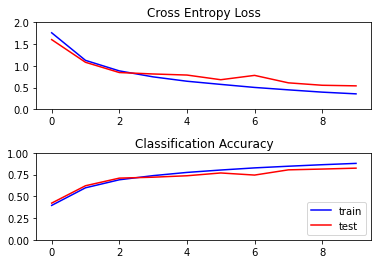

313/313 [==============================] - 3s 8ms/step - loss: 0.5584 - accuracy: 0.8136
Final TEST performance
loss: 0.5584395527839661
accuracy: 0.8136000037193298


In [ ]:
# This network topology is a bit more creative, and is essentially the three convolution layers 
# from the original network twice in a row, with a pooling step at the end of each.
# While the results are very good (consistently achieves on or above 0.8 accuracy on the test set)
# The topology is quite different from the original alexnet 
naught_point_eight_layers = [
    tf.keras.layers.Conv2D(filters=48, kernel_size=(3, 3), activation=tf.nn.relu, input_shape=(32, 32, 3), padding='same'),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(filters=192, kernel_size=(3, 3), activation=tf.nn.relu, padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=192, kernel_size=(3, 3), activation=tf.nn.relu, padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation=tf.nn.relu, padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(3, 3)),
    tf.keras.layers.Dropout(0.24),
    
    tf.keras.layers.Conv2D(filters=192, kernel_size=(3, 3), activation=tf.nn.relu, padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=192, kernel_size=(3, 3), activation=tf.nn.relu, padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation=tf.nn.relu, padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(3, 3)),
    tf.keras.layers.Dropout(0.24),
    
    # keep the final part for classification the same
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
]

train_model_with_params(naught_point_eight_layers, batch_size=128, num_epochs=10)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 48)        192       
_________________________________________________________________
dropout_9 (Dropout)          (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 32, 32, 128)       55424     
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 128)       512       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 10, 10, 128)       0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 10, 10, 128)      

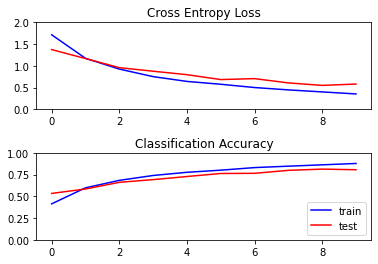

313/313 [==============================] - 1s 5ms/step - loss: 0.6010 - accuracy: 0.7999
Final TEST performance
loss: 0.6010011434555054
accuracy: 0.7998999953269958


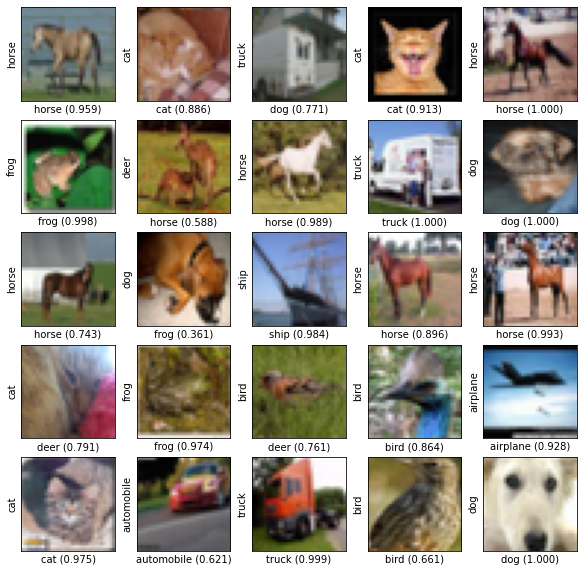

In [ ]:
# This network topology is based on the alexnet topology given to us for this assignment
# We have additionally done the following:
# - Add BatchNormalization after each convolutional layer
# - Add Dropout 0.1 after each convolutional layer
# - Added 2 more layers of 192 filters into the network
# - Removed pooling after the first convolutional layer
# Have a look at the analysis for extra information :)
alexnet_enhanced_layers = [
    tf.keras.layers.Conv2D(filters=48, kernel_size=(3, 3), activation=tf.nn.relu, input_shape=(32, 32, 3), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation=tf.nn.relu, padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(3, 3)),
    tf.keras.layers.Dropout(0.1),
    
    # Add two extra convolutional layers
    tf.keras.layers.Conv2D(filters=192, kernel_size=(3, 3), activation=tf.nn.relu, padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D(filters=192, kernel_size=(3, 3), activation=tf.nn.relu, padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D(filters=192, kernel_size=(3, 3), activation=tf.nn.relu, padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D(filters=192, kernel_size=(3, 3), activation=tf.nn.relu, padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation=tf.nn.relu, padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(3, 3)),
    tf.keras.layers.Dropout(0.1),
    
    # keep the final part for classification the same
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
]

# Train this model and show the result!
alex_model = train_model_with_params(alexnet_enhanced_layers, batch_size=128, num_epochs=10)

# This should display some predictions
show_random_predictions(alex_model)

## Analysis
From the first question, it is clear that the model is quite prone to overfitting, in which case it achieves a high accuracy for the training data, which it cannot match for the validation set. This is where generalisation can possible help us.

A first observation is that removing the first pooling operation greatly improves the accuracy and loss of the model. Additionally, some more layers were added. This structure, however, does not maintain the original alexnet structure of the problem. A 0.2 dropout was also added, as this value was found to work well: Going much higher or lower did make the model more generalised (training and testing results came closer together), but the overall accuracy achieved was significantly worse (eventually ending up near 0.5).

Next, batch normalization was added. We first attempted to normalize after each set of convolutional layers. This improved the accuracy already. It turned out, however, that normalizing after each convolutional layer yielded even better results, so this is what we ended up doing. As can be seen from the code and results above, this yielded an overall accuracy of over 0.8 for the testing set. The main disadvantage here is that still the overall structure of the alexnet is not maintained. 

Our last try, then, tried to maintain the existing structure as much as possible. The following changes were made, however:
- We **removed pooling after the first layer**. This improved the accuracy, while taking longer to run.
- We **added two more convolutional layers** with 192 filters to the last set of convolutional layers. This yielded a better result than adding 0, 1, 3 or 4 layers.
- We **applied batch normalization** after each convolutional layer. As mentioned before, this yielded a higher accuracy compared to not applying it, or only applying it after each set.
- We **applied 0.1 dropout** after each convolutional layer. Discarding 10% of result from nodes turned out to be the best working values. Not applying it at all, or using 0.05, 0.2, 0.3, 0.5 for the dropout, yielded worse accuracy. Dropping too many values results in a slower convergence, meaning the accuracy after 10 epochs is worse.

In the end, we have obtained a network topology that works well for the problem at hand, albeit not the fastest. If more epochs were available to us, we could have used a more accurate yet more slowly converging model topology instead.

# Part 3: Visualizing what CNN's learn

Once we have built a model we can try to understand what the model has learnt by visualizing the 

It is often said that deep learning models are "black boxes", learning representations that are difficult to extract and present in a 
human-readable form. While this is partially true for certain types of deep learning models, it is definitely not true for convnets. The 
representations learned by convnets are highly amenable to visualization, in large part because they are _representations of visual 
concepts_. Since 2013, a wide array of techniques have been developed for visualizing and interpreting these representations. Here we will use only one of the most accessible and useful ones as we will focus on visualizing intermediate convnet outputs ("intermediate activations"). This is useful to understand how successive convnet layers transform their input, and to get a first idea of the meaning of individual convnet filters.

We will use the small convnet that we trained in the previous section

## Visualizing intermediate activations

Visualizing intermediate activations consists in displaying the feature maps that are output by various convolution and pooling layers in a 
network, given a certain input (the output of a layer is often called its "activation", the output of the activation function). This gives 
a view into how an input is decomposed unto the different filters learned by the network. These feature maps we want to visualize have 3 
dimensions: width, height, and depth (channels). Each channel encodes relatively independent features, so the proper way to visualize these 
feature maps is by independently plotting the contents of every channel, as a 2D image.

Now let's load a random test image

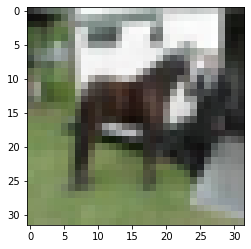

In [ ]:
from keras.preprocessing import image

# Take a random test image (e.g. number 20) and convert it to an array
img_tensor = image.img_to_array(test_images[20])
# Expand the first dimension 
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255

# Let's display our picture:
plt.imshow(img_tensor[0])

In order to extract the feature maps we want to look at, we will create a Keras model that takes batches of images as input, and outputs 
the activations of all convolution and pooling layers. To do this, we will use the Keras class `Model`. A `Model` is instantiated using two 
arguments: an input tensor (or list of input tensors), and an output tensor (or list of output tensors). The resulting class is a Keras 
model, just like the `Sequential` model that we used before, mapping the specified inputs to the specified outputs. What sets the 
`Model` class apart is that it allows for models with multiple outputs, unlike `Sequential`. 

In [ ]:
from keras import models

# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers[:10]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

When fed an image input, this model returns the values of the layer activations in the original model. This is from the sequential models that had exactly one input and one output. In the general case, a 
model could have any number of inputs and outputs. This one has one input and 8 outputs, one output per layer activation.

In [ ]:
# This will return a list of 5 Numpy arrays:
# one array per layer activation
activations = activation_model.predict(img_tensor)

For instance, this is the activation of the first convolution layer for our test image input:

In [ ]:
first_layer_activation = activations[0]
first_layer_activation.shape

(1, 32, 32, 48)

It's a 32x32 feature map with 48 channels. Let's try visualizing the 3rd channel:

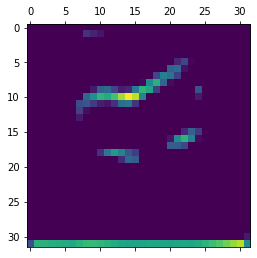

In [ ]:
plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.show()

Let's try the another channel (30th) -- but note that your own channels may vary, since the specific filters learned by convolution layers are not deterministic.

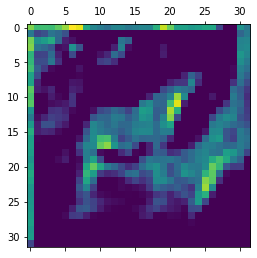

In [ ]:
plt.matshow(first_layer_activation[0, :, :, 30], cmap='viridis')
plt.show()

At this point, let's go and plot a complete visualization of all the activations in the network. We'll extract and plot every channel in each of our 8 activation maps, and we will stack the results in one big image tensor, with channels stacked side by side.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


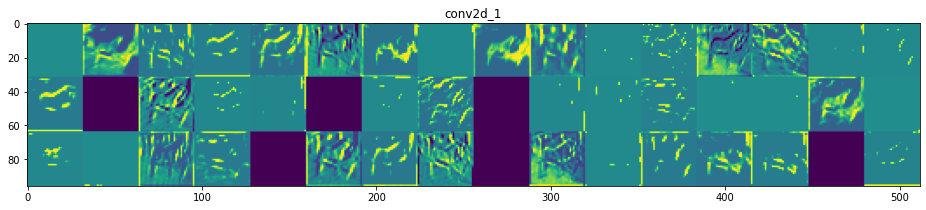

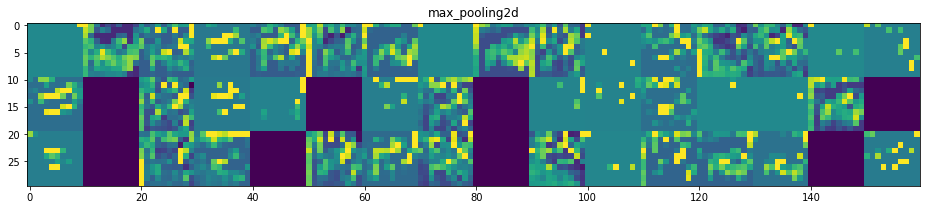

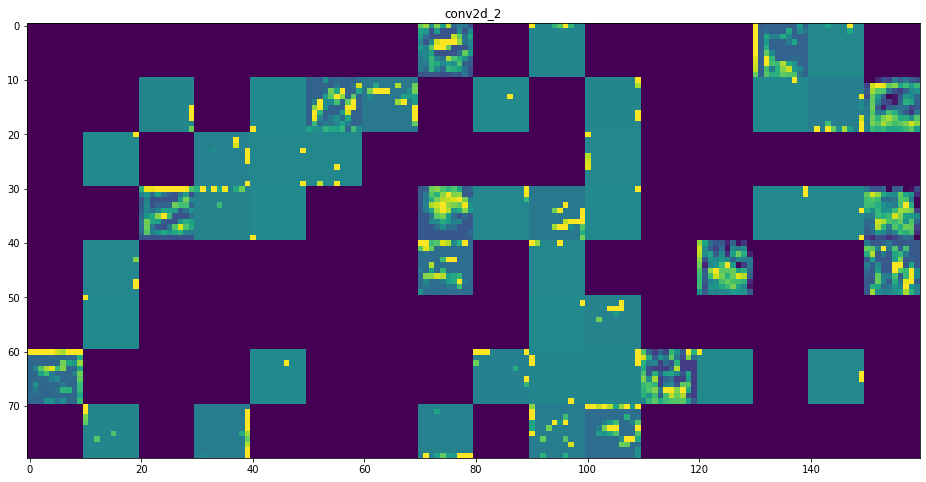

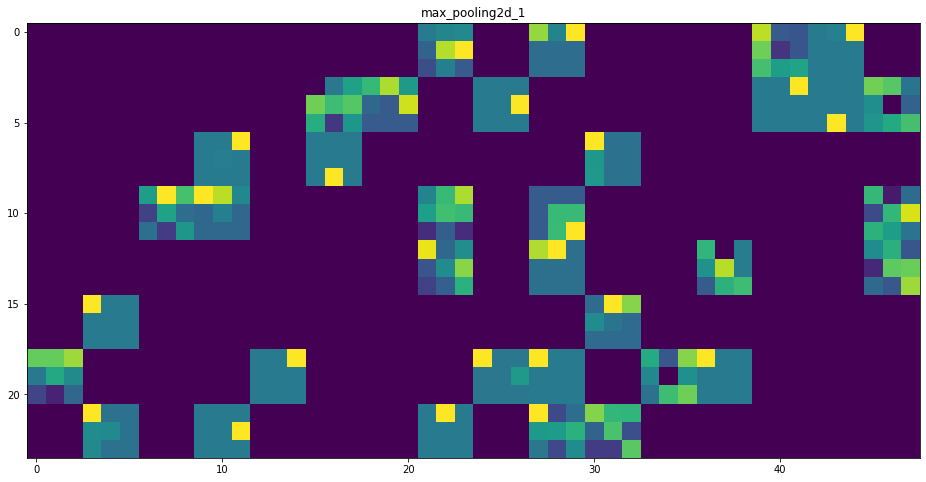

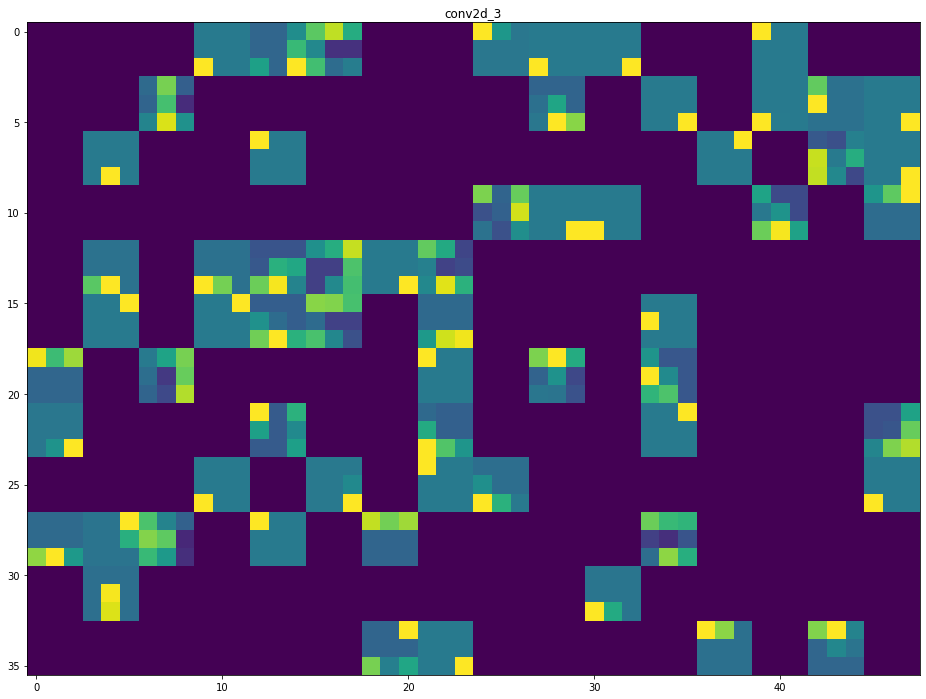

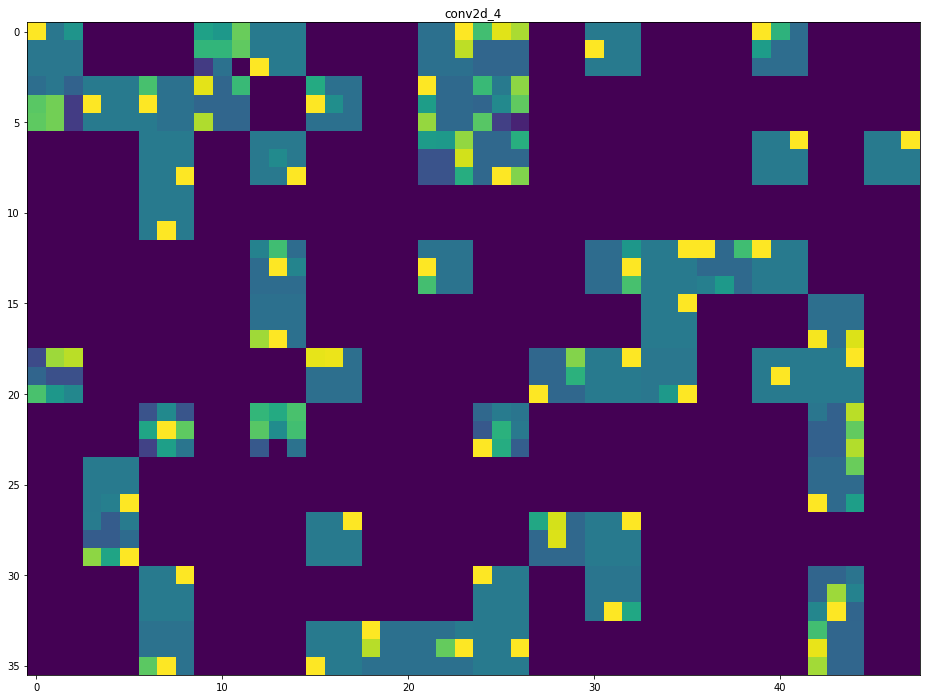

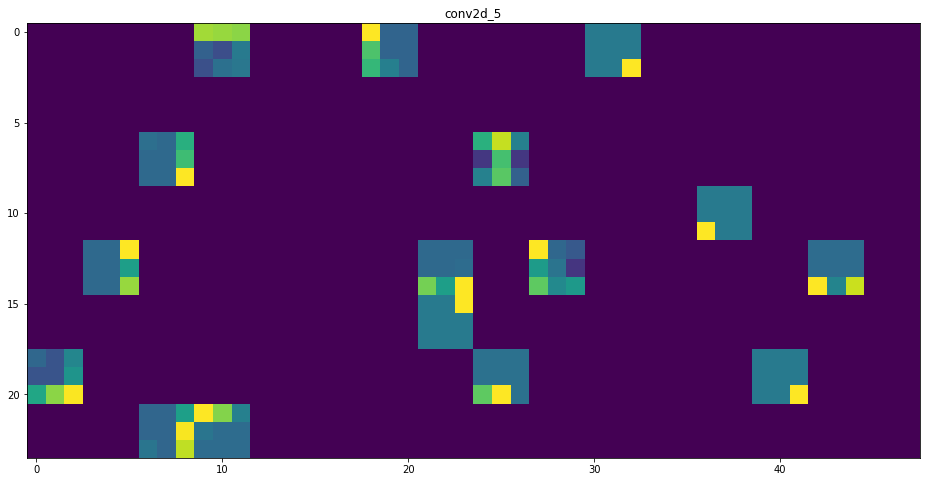

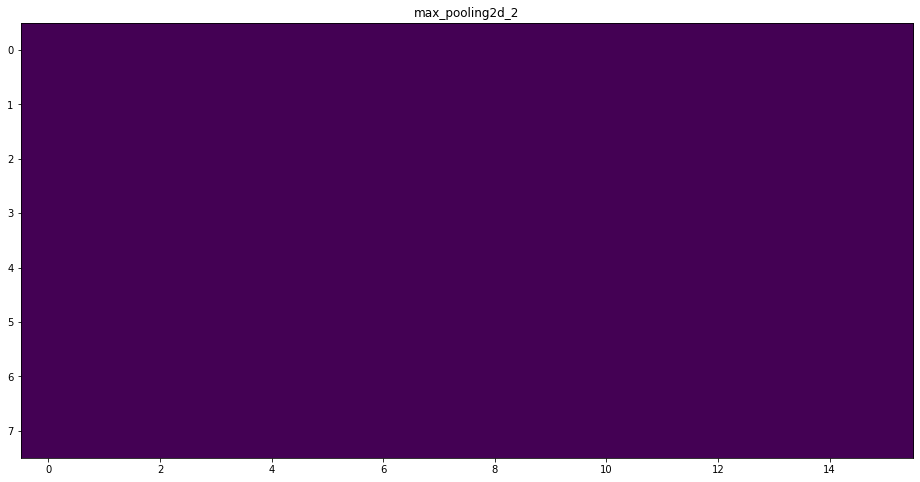

In [ ]:
import keras

# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()

A few remarkable things to note here:

* The first layer acts as a collection of various edge detectors. At that stage, the activations are still retaining almost all of the 
information present in the initial picture.
* As we go higher-up, the activations become increasingly abstract and less visually interpretable. They start encoding higher-level 
concepts. Higher-up presentations carry increasingly less information about the visual contents of the image, and increasingly more information related to the class of the image.
* The sparsity of the activations is increasing with the depth of the layer: in the first layer, all filters are activated by the input image, but in the following layers more and more filters are blank. This means that the pattern encoded by the filter isn't found in the input image. 




We have just evidenced a very important universal characteristic of the representations learned by deep neural networks: the features 
extracted by a layer get increasingly abstract with the depth of the layer. The activations of layers higher-up carry less and less 
information about the specific input being seen, and more and more information about the target. A deep neural network effectively acts as an __information distillation pipeline__, with raw data going in (in our case, RBG 
pictures), and getting repeatedly transformed so that irrelevant information gets filtered out (e.g. the specific visual appearance of the 
image) while useful information get magnified and refined (e.g. the class of the image).

This is analogous to the way humans and animals perceive the world: after observing a scene for a few seconds, a human can remember which 
abstract objects were present in it (e.g. bicycle, tree) but could not remember the specific appearance of these objects. In fact, if you 
tried to draw a generic bicycle from mind right now, chances are you could not get it even remotely right, even though you have seen 
thousands of bicycles in your lifetime. You brain has learned to completely abstract its visual input, to transform it into high-level visual concepts while completely filtering out irrelevant visual details, making it 
tremendously difficult to remember how things around us actually look.

## Question 3: Visualizing CNN's
Take 2 different test images and 2 different CNN's (e.g. from question 1-2) and show how the model visualize the intermediate activations. Compare the images and models and explain their similarities and differences. 

### Analysis

These feature maps we want to visualize have 3 dimensions: width, height, and depth (channels). 

**cnn1**:
'cnn1' does not implement pooling, thus the number of paremeters in this model are not reduced, and therefore it is a computationally expensive model to run.

When visualising the intermediate activations through feature maps, it is clearly evident that there is no pooling, for the resolution is always the same throughout all convolutions. As aforementioned, with more layers, more filters become blank, because less filters are activated by the input image, and the encoded pattern of the filter is not found in the input. This is made apparent in the visualisation of this model where with each convolution, more and more 'non-blank' tiles can be counted.




**alex_model** :

When compared to cnn1, this model acheives a higher training and validation score.

When visualising the intermediate activations through feature maps, resolution changes throughout the different convolutions, supporting the fact that pooling was implemented in the model.  The first layer retains most of the information that was provided in the initial iamge.  However, unlike the 'cnn1' model which omitted pooling, as we proceed to higher convolutions with the 'alex_model', the visual information pertaining to the original image becomes harder to interpret. As aforementioned, with more layers, more filters become blank, because less filters are activated by the input image, and the encoded pattern of the filter is not found in the input.  This is made apparent in the visualisation of this model where with each convolution, more and more 'non-blank' tiles can be counted.  Ultimately, the specific visual appearance of the image is filtered out as we go higher in layers however useful information is retained.  This is also observed in the visualisation as image specific details disapear from one convolution to the other.


The visualisations make it evident that the 'alex_model' is clearly more reliable than the 'cnn1' model.  When comparing training and validation scores, the models themselves also echo this same notion.  The fact that 'alex_model' is also deeper than 'cnn1' is made apparent in the visualisations and the number of features that are detectable. 

In [ ]:
# gain insight into shape of test images so that we can properly generate a random number for image testing
test_images.shape

(10000, 32, 32, 3)

Question 1 Model, 'cnn1', for Test Image 1


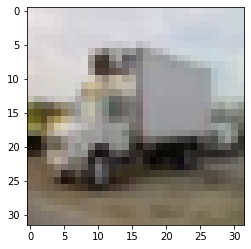

In [ ]:
# question 1 model: 'cnn1', test image 1

from keras.preprocessing import image

# Take a random test image (e.g. number 20) and convert it to an array
img_tensor = image.img_to_array(test_images[random.randint(0,9999)])

# Expand the first dimension 
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255

# Let's display our picture:
plt.imshow(img_tensor[0])

In [ ]:
from keras import models

# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in cnn1.layers[:10]]

# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=cnn1.input, outputs=layer_outputs)

In [ ]:
# return a list of 5 Numpy arrays: one array per layer activation
activations = activation_model.predict(img_tensor)

In [ ]:
first_layer_activation = activations[0]
first_layer_activation.shape

(1, 32, 32, 8)

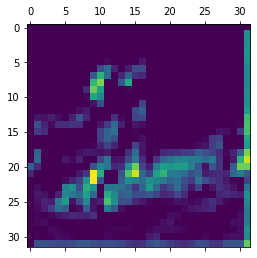

In [ ]:
plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.show()

In [ ]:
import keras

# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in cnn1.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()

ValueError: ignored

Question 1 Model, 'cnn1', for Test Image 2

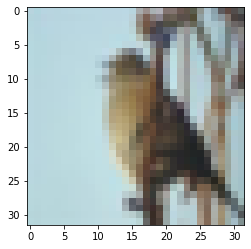

In [ ]:
# question 1 model: 'cnn1', test image 2

# Take a random test image (e.g. number 20) and convert it to an array
img_tensor = image.img_to_array(test_images[random.randint(0,9999)])

# Expand the first dimension 
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255

# Let's display our picture:
plt.imshow(img_tensor[0])

In [ ]:
# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in cnn1.layers[:10]]

# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=cnn1.input, outputs=layer_outputs)

In [ ]:
# return a list of 5 Numpy arrays: one array per layer activation
activations = activation_model.predict(img_tensor)

In [ ]:
first_layer_activation = activations[0]
first_layer_activation.shape

(1, 32, 32, 8)

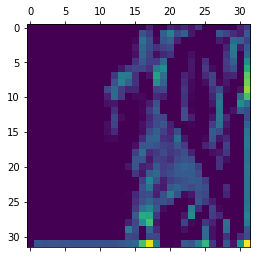

In [ ]:
plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.show()

In [ ]:
# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in cnn1.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()

ValueError: ignored

Question 2 Model, 'alex_model', for Test Image 1

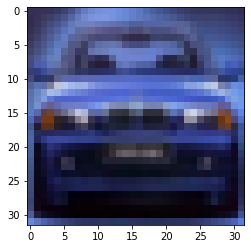

In [ ]:
# question 2 model: 'alex_model', test image 1

from keras.preprocessing import image

# Take a random test image (e.g. number 20) and convert it to an array
img_tensor = image.img_to_array(test_images[random.randint(0,9999)])

# Expand the first dimension 
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255

# Let's display our picture:
plt.imshow(img_tensor[0])

In [ ]:
from keras import models

# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in alex_model.layers[:10]]

# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=alex_model.input, outputs=layer_outputs)

NameError: ignored

In [ ]:
# return a list of 5 Numpy arrays: one array per layer activation
activations = activation_model.predict(img_tensor)

In [ ]:
first_layer_activation = activations[0]
first_layer_activation.shape

In [ ]:
plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.show()

In [ ]:
import keras
# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in alex_model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()

In [ ]:
Question 2 Model, 'lex_model', for Test Image 2

In [ ]:
# question 2 model: 'alex_model', test image 2

from keras.preprocessing import image

# Take a random test image (e.g. number 20) and convert it to an array
img_tensor = image.img_to_array(test_images[random.randint(0,9999)])

# Expand the first dimension 
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255

# Let's display our picture:
plt.imshow(img_tensor[0])

In [ ]:
from keras import models

# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in alex_model.layers[:10]]

# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=alex_model.input, outputs=layer_outputs)

In [ ]:
# return a list of 5 Numpy arrays: one array per layer activation
activations = activation_model.predict(img_tensor)

In [ ]:
first_layer_activation = activations[0]
first_layer_activation.shape

In [ ]:
plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.show()

In [ ]:
import keras
# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in alex_model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()

# Part 4: U-Net's

## Loading data
First, we start by loading the training data set, which consist of 999 images of 256x256 pixels and 3 channels (R,G,B) and their corresponding road mask. This road mask has been obtained by thresholding the Google Maps background that corresponds to the satellit image. In this thresholding step all white pixels in the Google Maps background are converted to a road masks.

```
# This is formatted as code
```

 

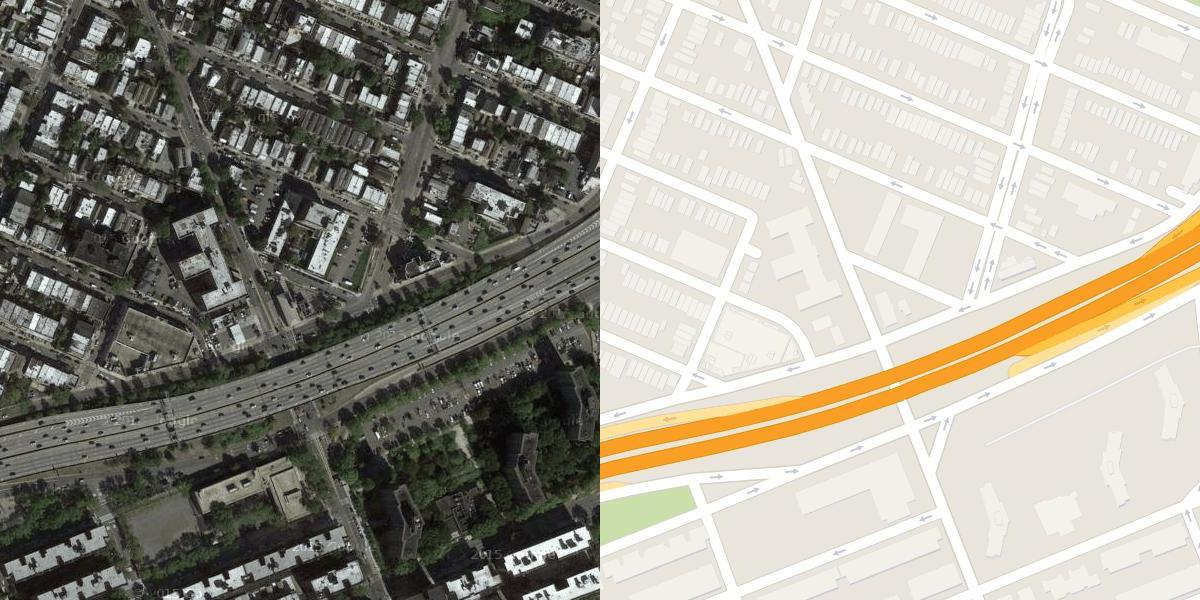

In [ ]:
# Load the compressed training data set
file = h5py.File('Dataset_train.h5', 'r')
# Get the images
imgs_train = file.get('images')
# Get the road labels
imgs_mask_train = file.get('masks')
imgs_train = np.array(imgs_train)
imgs_mask_train = np.array(imgs_mask_train)

imgs_train = imgs_train.astype('float32')
mean = np.mean(imgs_train)  # mean for data centering
std = np.std(imgs_train)  # std for data normalization

imgs_train -= mean
imgs_train /= std

imgs_mask_train = imgs_mask_train.astype('float32')
imgs_mask_train /= 255  # scale masks to [0, 1]

Now let's plot a random image and corresponding mask


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 255.5, 255.5, -0.5)

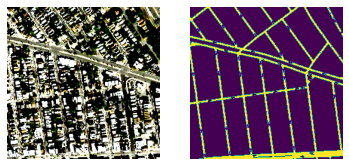

In [ ]:
plt.subplot(121)
plt.imshow(imgs_train[5,:,:,:]) 
plt.axis('off')
plt.subplot(122)
plt.imshow(imgs_mask_train[5,:,:,0]) 
plt.axis('off')

## The U-Net classifier

Before using the U-Net, we first need to define its architecture, which follows a similar approach as the earlier CNN's but now includes the upsampling layers. To do so, we do not use a Sequential model, but build our own model, where each of the layers uses the input of the previous layer

In [ ]:
# Load the necessary packages
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint
from keras import backend as keras

### Define the U-Net architecture

In [ ]:
# Define the U-Net model
def unet(input_size = (256, 256, 3)):
    inputs = Input(input_size)

    # Convolution 1
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', 
                                               kernel_initializer = 'he_normal'
                                               )(inputs)

    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', 
                                               kernel_initializer = 'he_normal'
                                               )(conv1)
    
    # Pooling 1
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    
    # Convolution 2
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', 
                                                kernel_initializer = 'he_normal'
                                                )(pool1)
    
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', 
                                                kernel_initializer = 'he_normal'
                                                )(conv2)
    
    # Pooling 2
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    
    # Convolution 3
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', 
                                                kernel_initializer = 'he_normal'
                                                )(pool2)
    
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same',
                                                kernel_initializer = 'he_normal'
                                                )(conv3)
    # Pooling 3
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    
    # Convolution 4
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', 
                                                kernel_initializer = 'he_normal'
                                                )(pool3)
    
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', 
                                                kernel_initializer = 'he_normal'
                                                )(conv4)
    # Dropout
    drop4 = Dropout(0.5)(conv4)
    
    # Pooling 4
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    # Convolution 5
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', 
                                                 kernel_initializer = 'he_normal'
                                                 )(pool4)
    
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', 
                                                 kernel_initializer = 'he_normal'
                                                 )(conv5)
    # Dropout
    drop5 = Dropout(0.5)(conv5)

    # Upward Convolution 6
    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', 
                                              kernel_initializer = 'he_normal'
                                              )(UpSampling2D(size = (2,2))(drop5))
    
    # Here we copy the input from the upward convolution and contraction path
    merge6 = concatenate([drop4,up6])
    
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same',
                                                kernel_initializer = 'he_normal'
                                                )(merge6)
    
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same',
                                                kernel_initializer = 'he_normal'
                                                )(conv6)

    # Upward Convolution 7
    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same',
                                              kernel_initializer = 'he_normal'
                                              )(UpSampling2D(size = (2,2))(conv6))
    
    # Here we copy the input from the upward convolution and contraction path
    merge7 = concatenate([conv3,up7])
    
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same',
                                                kernel_initializer = 'he_normal'
                                                )(merge7)
    
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal'
                                                )(conv7)

    # Upward Convolution 8
    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same',
                                              kernel_initializer = 'he_normal'
                                              )(UpSampling2D(size = (2,2))(conv7))
    
    # Here we copy the input from the upward convolution and contraction path
    merge8 = concatenate([conv2,up8])
    
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same',
                                                kernel_initializer = 'he_normal'
                                                )(merge8)
    
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same',
                                                kernel_initializer = 'he_normal'
                                                )(conv8)
    # Upward Convolution 9
    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same',
                                             kernel_initializer = 'he_normal'
                                             )(UpSampling2D(size = (2,2))(conv8))
    
    # Here we copy the input from the upward convolution and contraction path
    merge9 = concatenate([conv1,up9])
    
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same',
                                               kernel_initializer = 'he_normal'
                                               )(merge9)
    
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same',
                                               kernel_initializer = 'he_normal'
                                               )(conv9)
    
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same',
                                              kernel_initializer = 'he_normal'
                                              )(conv9)
    
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(inputs = inputs, outputs = conv10)

    model.compile(optimizer = Adam(lr = 1e-3), loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    return model

In [ ]:
# Initiate the U-Net model
model = unet()

# Show the model architecture
model.summary()

Model: "functional_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_90 (Conv2D)              (None, 256, 256, 64) 1792        input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_91 (Conv2D)              (None, 256, 256, 64) 36928       conv2d_90[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_18 (MaxPooling2D) (None, 128, 128, 64) 0           conv2d_91[0][0]                  
______________________________________________________________________________________

Now let's define a checkpoint function that allows us to save the weights

In [ ]:
model_checkpoint = ModelCheckpoint('weights.h5', monitor='val_loss', save_best_only=True)

### Fit the U-Net model
Fit the model to the training data. Notice that this is again very similar to the CNN's, we only do not use the fixed validation_data, but use the validation_split (i.e., Fraction of the training data to be used as validation data).

In [ ]:
history =  model.fit(imgs_train, imgs_mask_train, batch_size=20, epochs=20, verbose=1, shuffle=True,
          validation_split=0.2,
          callbacks=[model_checkpoint])

It can take relatively long before obtaining a good accuracy on the U-Net. Therefore, it is important to save the weights with the `model_checkpoint` function, so we can later load and re-use them.

### Test performance
Let's test the performance on the test data set, which we also need to load:

In [ ]:
# Load data
file = h5py.File('Dataset_test.h5', 'r')
# get images
imgs_test = file.get('images')
# get labels
imgs_mask_test = file.get('masks')
imgs_test = np.array(imgs_test)
imgs_mask_test = np.array(imgs_mask_test).astype('float32')
imgs_test = imgs_test.astype('float32')
# normalize
imgs_test -= mean
imgs_test /= std
imgs_mask_test /= 255


Load saved weights:

In [ ]:
# Load saved weights (can also be used when returning to model later)
model.load_weights('weights.h5')

Predict labels on test data

In [ ]:
# Predicting label on test data
out_mask_test = model.predict(imgs_test, verbose=1)

4/4 [==============================] - 4s 981ms/step


Plot the results:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


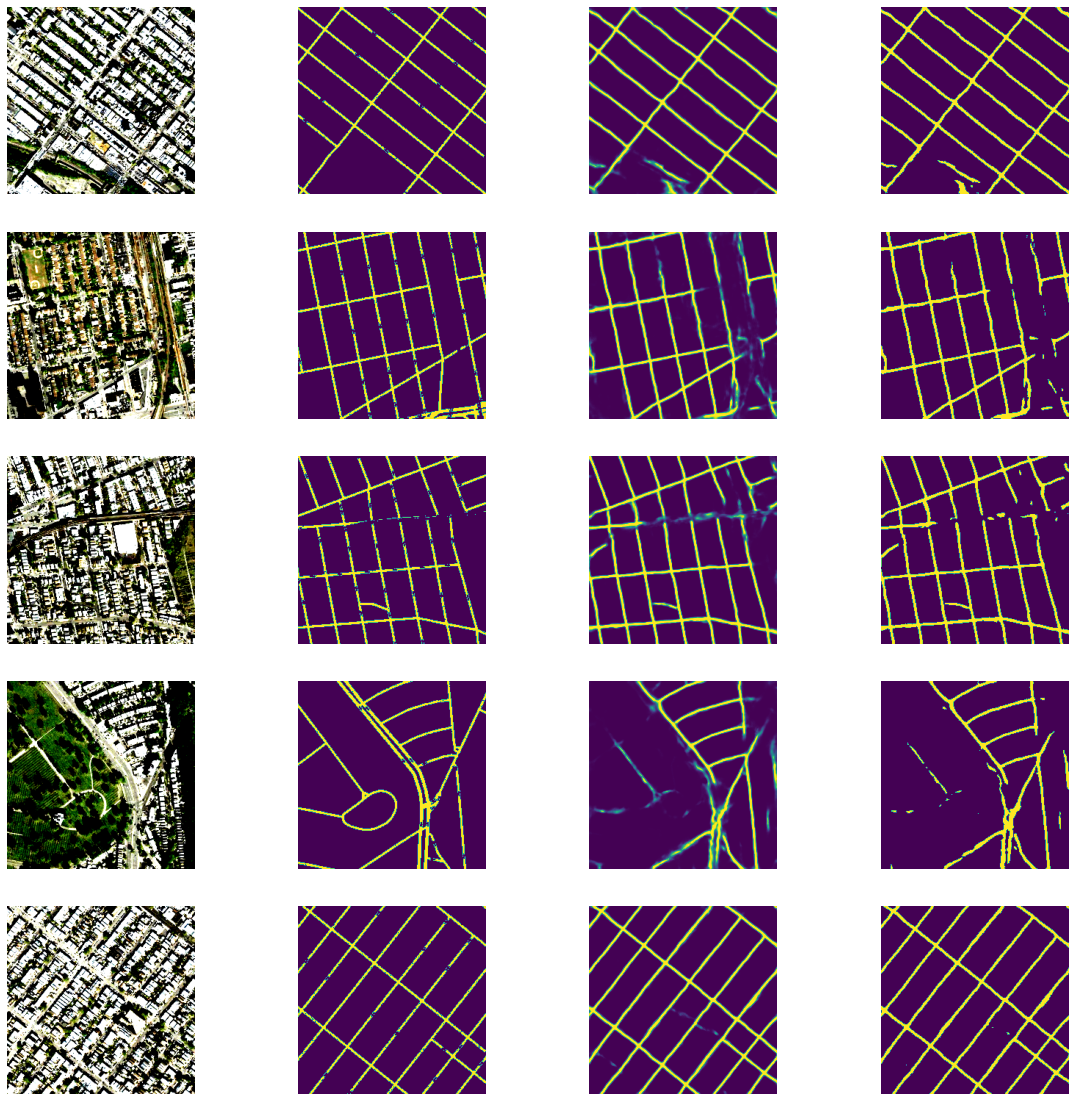

In [ ]:
plt.figure(figsize=(20,20))
for i in range(5):
  # Plotting the input image
  plt.subplot(5, 4, i*4+1)
  plt.imshow(imgs_test[i,:,:,:],vmin=0,vmax=255)
  plt.axis('off')
  # Plotting the input labels
  plt.subplot(5, 4, i*4+2)
  plt.imshow(imgs_mask_test[i,:,:,0],vmin=0,vmax=1)
  plt.axis('off')
  # Plotting the output classifier
  plt.subplot(5, 4, i*4+3)
  plt.imshow(out_mask_test[i,:,:,0])
  plt.axis('off')
  # Plotting the output rescaled by thresholding output
  plt.subplot(5, 4, i*4+4)
  plt.imshow(out_mask_test[i,:,:,0]>0.3)
  plt.axis('off')

## Question 4: Applying and understanding U-Nets

Apply the U-Net architecture to the entire training set and increase the learning time (epochs) to improve performance.

Plot the model performance for both the training and testing.

Plot the input image and label vs. the U-Net trained label and identify discuss the performance. Identify cases where the model performs poorly and well, respectively, at identifying the roads. Explain why this is the case.

In [ ]:
#loading the entire training set
file_q4 = h5py.File('Dataset_train.h5', 'r')
#list(file_q4) - output is ['images', 'masks']
train_images_q4 = file_q4.get('images')
# get labels
train_masks_q4 = file_q4.get('masks')
train_images_q4 = np.array(train_images_q4)
train_masks_q4 = np.array(train_masks_q4).astype('float32')
train_images_q4 = train_images_q4.astype('float32')
# normalize
train_images_q4 -= mean
train_images_q4 /= std
train_masks_q4 /= 255

### Fitting the U-Net model to the training data

In [ ]:
#adding a different model checkpoint for q4. same code as given in the assignment, just saving it to a new variable to avoid confusion
model_checkpoint_q4 = ModelCheckpoint('weights.h5', monitor='val_loss', save_best_only=True)

In [ ]:
#using the U-Net architecture provided earlier for Question 4
history_train_q4 =  model.fit(train_images_q4, train_masks_q4, batch_size=20, epochs=30, verbose=1, shuffle=True, validation_split=0.2,
                              callbacks=[model_checkpoint_q4])

Epoch 1/30
40/40 [==============================] - 122s 3s/step - loss: 0.0924 - accuracy: 0.9624 - val_loss: 0.1248 - val_accuracy: 0.9548
Epoch 2/30
40/40 [==============================] - 122s 3s/step - loss: 0.0883 - accuracy: 0.9640 - val_loss: 0.1246 - val_accuracy: 0.9558
Epoch 3/30
40/40 [==============================] - 118s 3s/step - loss: 0.0829 - accuracy: 0.9666 - val_loss: 0.1279 - val_accuracy: 0.9569
Epoch 4/30
40/40 [==============================] - 122s 3s/step - loss: 0.0809 - accuracy: 0.9676 - val_loss: 0.1241 - val_accuracy: 0.9567
Epoch 5/30
40/40 [==============================] - 118s 3s/step - loss: 0.0789 - accuracy: 0.9686 - val_loss: 0.1258 - val_accuracy: 0.9570
Epoch 6/30
40/40 [==============================] - 118s 3s/step - loss: 0.0772 - accuracy: 0.9694 - val_loss: 0.1272 - val_accuracy: 0.9569
Epoch 7/30
40/40 [==============================] - 118s 3s/step - loss: 0.0759 - accuracy: 0.9701 - val_loss: 0.1266 - val_accuracy: 0.9568
Epoch 8/30
40

AttributeError: ignored

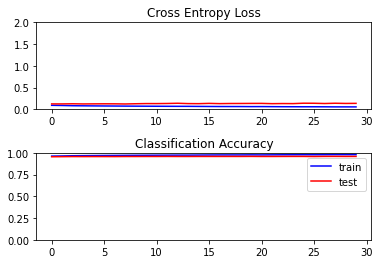

In [ ]:
#plotting performance of u-net for training and testing data
# plot loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history_train_q4.history['loss'], color='blue', label='train')
plt.plot(history_train_q4.history['val_loss'], color='red', label='test')
plt.ylim(0, 2)
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history_train_q4.history['accuracy'], color='blue', label='train')
plt.plot(history_train_q4.history['val_accuracy'], color='red', label='test')
plt.ylim(0, 1)
# add legend
plt.legend()
# Tweak spacing between subplots to prevent labels from overlapping
plt.subplots_adjust(hspace=0.5)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


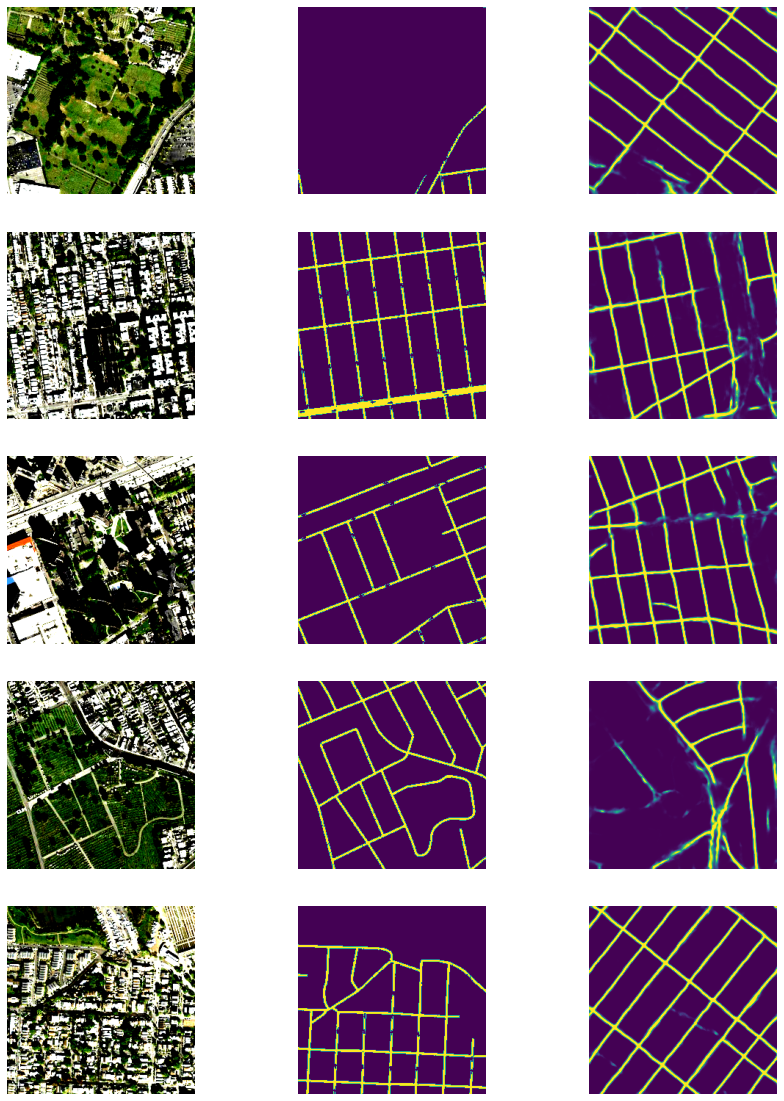

In [ ]:
# Plotting the input image
plt.figure(figsize=(20,20))
for i in range(5):
  plt.subplot(5, 4, i*4+1)
  plt.imshow(train_images_q4[i,:,:,:],vmin=0,vmax=255)
  plt.axis('off')
  # Plotting the input labels
  plt.subplot(5, 4, i*4+2)
  plt.imshow(train_masks_q4[i,:,:,0],vmin=0,vmax=1)
  plt.axis('off')
  # Plotting the output classifier
  plt.subplot(5, 4, i*4+3)
  plt.imshow(out_mask_test[i,:,:,0])
  plt.axis('off')

As we can see from the plots of the images, U-Net tends to work well if the roads are (fairly) unobstructed or demarcated clearly. It tends to struggle when there are a lot of buildings or other objects near the road. If there is a lot of flat land near the roads, like meadows, yards, lawns, etc. it tends to adapt to that fairly quickly and is able to show the roads clearly. Also if the roads have uniform color (of the asphalt) that also makes it easier for U-Net to identify them.